<a href="https://colab.research.google.com/github/dibdin/HIV-reverse-transcriptase/blob/code/Part_2_HIV_rtranscriptase_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Repurposing cheap drugs for HIV**

original code credit: Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-10-31 03:02:59--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   128MB/s    in 0.6s    

2021-10-31 03:03:00 (128 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## **Load bioactivity data**

In [ ]:
! wget https://raw.githubusercontent.com/dibdin/HIV-reverse-transcriptase/main/bioactivity_preprocessed_data_HIVrtranscriptase.csv

--2021-10-31 03:06:11--  https://raw.githubusercontent.com/dibdin/HIV-reverse-transcriptase/main/bioactivity_preprocessed_data_HIVrtranscriptase.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732893 (716K) [text/plain]
Saving to: ‘bioactivity_preprocessed_data_HIVrtranscriptase.csv’

bioactivity_preproc 100%[===================>] 715.72K  --.-KB/s    in 0.05s   

2021-10-31 03:06:12 (12.9 MB/s) - ‘bioactivity_preprocessed_data_HIVrtranscriptase.csv’ saved [732893/732893]



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_preprocessed_data_HIVrtranscriptase.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,inactive,10000.00
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,active,457.09
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,inactive,100000.00
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,inactive,32100.00
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,inactive,12600.00
...,...,...,...,...
9114,CHEMBL57,Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1,intermediate,1550.00
9115,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,12.00
9116,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,0.76
9117,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,2.60


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,331.239,1.42020,2.0,4.0
1,292.382,4.42332,2.0,3.0
2,247.279,1.13990,3.0,4.0
3,257.337,2.28230,1.0,3.0
4,285.391,2.91840,1.0,3.0
...,...,...,...,...
9114,266.304,2.65122,1.0,4.0
9115,527.829,5.89212,2.0,4.0
9116,527.829,5.89212,2.0,4.0
9117,527.829,5.89212,2.0,4.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,inactive,10000.00
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,active,457.09
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,inactive,100000.00
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,inactive,32100.00
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,inactive,12600.00
...,...,...,...,...
9114,CHEMBL57,Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1,intermediate,1550.00
9115,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,12.00
9116,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,0.76
9117,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,2.60


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,inactive,10000.00,331.239,1.42020,2.0,4.0
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,active,457.09,292.382,4.42332,2.0,3.0
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,inactive,100000.00,247.279,1.13990,3.0,4.0
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,inactive,32100.00,257.337,2.28230,1.0,3.0
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,inactive,12600.00,285.391,2.91840,1.0,3.0
...,...,...,...,...,...,...,...,...
9114,CHEMBL57,Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1,intermediate,1550.00,266.304,2.65122,1.0,4.0
9115,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,12.00,527.829,5.89212,2.0,4.0
9116,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,0.76,527.829,5.89212,2.0,4.0
9117,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,2.60,527.829,5.89212,2.0,4.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count    9.119000e+03
mean     6.317994e+04
std      5.895731e+05
min      5.000000e-05
25%      1.000000e+02
50%      1.000000e+03
75%      1.060000e+04
max      1.901078e+07
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,inactive,331.239,1.42020,2.0,4.0,10000.00
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,active,292.382,4.42332,2.0,3.0,457.09
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,inactive,247.279,1.13990,3.0,4.0,100000.00
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,inactive,257.337,2.28230,1.0,3.0,32100.00
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,inactive,285.391,2.91840,1.0,3.0,12600.00
...,...,...,...,...,...,...,...,...
9114,CHEMBL57,Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1,intermediate,266.304,2.65122,1.0,4.0,1550.00
9115,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,527.829,5.89212,2.0,4.0,12.00
9116,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,527.829,5.89212,2.0,4.0,0.76
9117,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,527.829,5.89212,2.0,4.0,2.60


In [ ]:
df_norm.standard_value_norm.describe()

count    9.119000e+03
mean     6.317994e+04
std      5.895731e+05
min      5.000000e-05
25%      1.000000e+02
50%      1.000000e+03
75%      1.060000e+04
max      1.901078e+07
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,inactive,331.239,1.42020,2.0,4.0,5.000000
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,active,292.382,4.42332,2.0,3.0,6.339998
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,inactive,247.279,1.13990,3.0,4.0,4.000000
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,inactive,257.337,2.28230,1.0,3.0,4.493495
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,inactive,285.391,2.91840,1.0,3.0,4.899629
...,...,...,...,...,...,...,...,...
9114,CHEMBL57,Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1,intermediate,266.304,2.65122,1.0,4.0,5.809668
9115,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,527.829,5.89212,2.0,4.0,7.920819
9116,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,527.829,5.89212,2.0,4.0,9.119186
9117,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,527.829,5.89212,2.0,4.0,8.585027


In [ ]:
df_final.pIC50.describe()

count    9119.000000
mean        5.992181
std         1.424656
min         1.721000
25%         4.974694
50%         6.000000
75%         7.000000
max        13.301030
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL296346,S=C(NCN1CCOCC1)Nc1ccc(Br)cn1,inactive,331.239,1.42020,2.0,4.0,5.000000
1,CHEMBL318730,CCc1cc(NCc2ccc3ccccc3c2)c(O)nc1C,active,292.382,4.42332,2.0,3.0,6.339998
2,CHEMBL303928,O=c1[nH]c2c(c(=O)[nH]1)CNc1ccccc1S2,inactive,247.279,1.13990,3.0,4.0,4.000000
3,CHEMBL68175,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C)C1,inactive,257.337,2.28230,1.0,3.0,4.493495
4,CHEMBL69775,C=C(C)CN1Cc2cccc3[nH]c(=O)n(c23)C(C(C)C)C1,inactive,285.391,2.91840,1.0,3.0,4.899629
...,...,...,...,...,...,...,...,...
9112,CHEMBL4637849,CS(=O)(=O)c1ccc(NC(=O)CSc2nnc(N3C(=O)CSC3c3ccc...,inactive,541.101,4.10440,1.0,9.0,4.802719
9113,CHEMBL4633284,CS(=O)(=O)c1ccc(NC(=O)CSc2nnc(N3C(=O)CSC3c3ccc...,inactive,541.101,4.10440,1.0,9.0,4.404173
9115,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,527.829,5.89212,2.0,4.0,7.920819
9116,CHEMBL4636332,Cc1c(NC(=O)COc2ccc(Cl)cc2C(=O)c2cc(F)cc(C(F)(F...,active,527.829,5.89212,2.0,4.0,9.119186


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

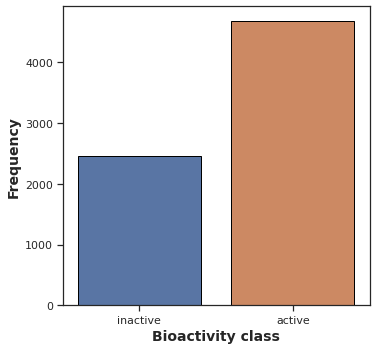

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**


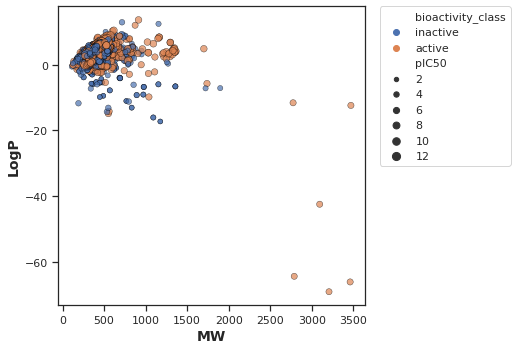

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

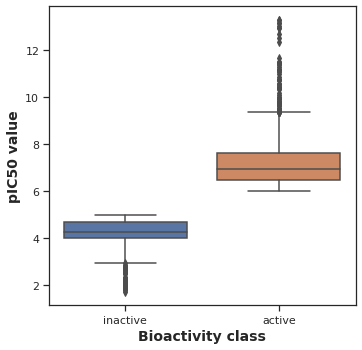

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

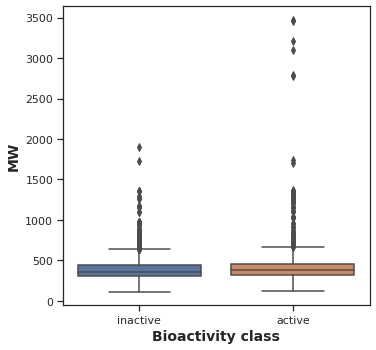

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,5172816.0,7.189455e-13,0.05,Different distribution (reject H0)


#### **LogP**

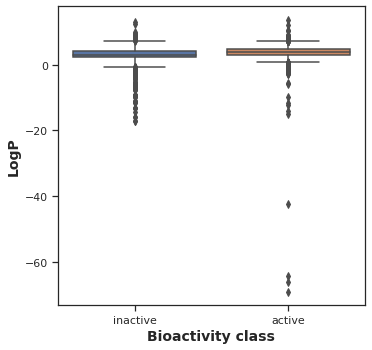

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,4296277.0,3.965389e-70,0.05,Different distribution (reject H0)


#### **NumHDonors**

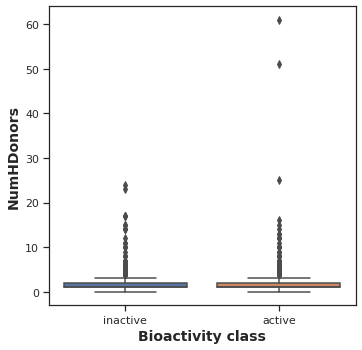

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,5596232.0,0.019441,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

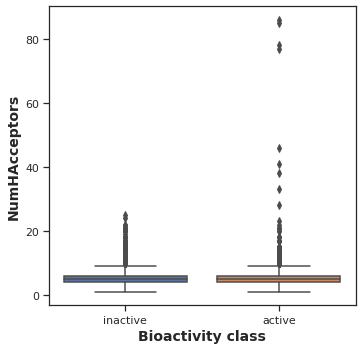

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,5503648.0,0.000879,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All 4 Lipinski's descriptors show ***statistically significant difference*** between **actives** and **inactives**.

# Download CSV of df_combined (bioactivity data + lipinski + pIC50)

In [ ]:
! ls -l

total 85012
-rw-r--r-- 1 root root   732893 Oct 31 03:06 bioactivity_preprocessed_data_HIVrtranscriptase.csv
-rw-r--r-- 1 root root      125 Oct 31 03:08 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      123 Oct 31 03:08 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      134 Oct 31 03:08 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      130 Oct 31 03:08 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      102 Oct 31 03:08 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    13410 Oct 31 03:07 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    16018 Oct 31 03:07 plot_ic50.pdf
-rw-r--r-- 1 root root    15704 Oct 31 03:08 plot_LogP.pdf
-rw-r--r-- 1 root root    14519 Oct 31 03:08 plot_MW.pdf
-rw-r--r-- 1 root root  1133519 Oct 31 03:07 plot_MW_vs_LogP.pdf
-rw-r--r-- 1 root root    15541 Oct 31 03:08 plot_NumHAcceptors.pdf
-rw-r--r-- 1 root root    15626 Oct 31 03:08 plot_NumHDonors.pdf
drwxr-xr-x 1 r

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df_2class.to_csv('bioactivity_HIVrtranscriptase_lipinski_pIC50_combined.csv')
! cp bioactivity_HIVrtranscriptase_lipinski_pIC50_combined.csv "/content/gdrive/My Drive/Colab Notebooks/dataHIVrtranscriptase"

In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/dataHIVrtranscriptase"

bioactivity_data_HIVrtranscriptase.csv
bioactivity_HIVrtranscriptase_lipinski_pIC50_combined.csv
bioactivity_preprocessed_data_HIVrtranscriptase.csv


## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: bioactivity_preprocessed_data_HIVrtranscriptase.csv (deflated 86%)
  adding: plot_MW.pdf (deflated 35%)
  adding: plot_LogP.pdf (deflated 33%)
  adding: mannwhitneyu_pIC50.csv (deflated 14%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: bioactivity_HIVrtranscriptase_lipinski_pIC50_combined.csv (deflated 82%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_MW_vs_LogP.pdf (deflated 1%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: plot_ic50.pdf (deflated 35%)
